# HEART FAILURE PREDICTION


In [1]:
# Data clearnning and EDA
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
cd C:\Users\PC\OneDrive - RMIT University\Desktop\Reasearch Methods\Group assignment\EEET2485-heart-failure-prediction-main

C:\Users\PC\OneDrive - RMIT University\Desktop\Reasearch Methods\Group assignment\EEET2485-heart-failure-prediction-main


In [3]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [4]:
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
health_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

#### 3. The patients’ age and sex affect the health indicators 

##### ANOVA results

In [5]:
# rsquared: get r squared
# fvalue: get f value
# f_pvalue: get p value
# params: get coefficient
# tvalues: get t-statistic

test_results = []
coef_results = []
t_results = []
for feature in health_features:
    results = smf.ols(feature + ' ~ age + sex', data=data).fit()
    
    test_values = [round(results.rsquared, 3), round(results.fvalue, 3), round(results.f_pvalue, 3)]
    test_results.append(test_values)
    coef_values = [round(results.params[1], 4), round(results.params[2], 4)]
    coef_results.append(coef_values)
    t_values = [round(results.tvalues[1], 3), round(results.tvalues[2], 3)]
    t_results.append(t_values)
    
    print('\033[1m ANOVA of age and sex with', feature,'\033[0m')
    print(results.summary())
    print('\n')

 ANOVA of age and sex with anaemia 
                            OLS Regression Results                            
Dep. Variable:                anaemia   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.697
Date:                Fri, 21 May 2021   Prob (F-statistic):             0.0691
Time:                        02:41:12   Log-Likelihood:                -211.47
No. Observations:                 299   AIC:                             428.9
Df Residuals:                     296   BIC:                             440.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0

##### Summary of the analysis

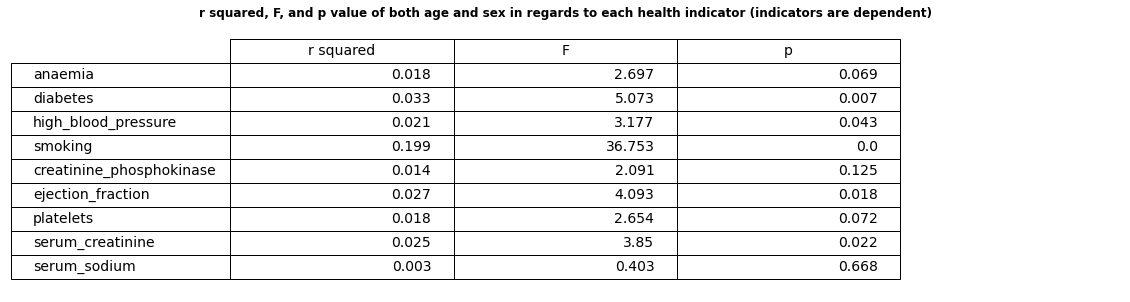

In [6]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = test_results,  
    rowLabels = health_features,  
    colLabels = ['r squared', 'F', 'p'],
    colWidths = [0.1] * 3,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('r squared, F, and p value of both age and sex in regards to each health indicator (indicators are dependent)', fontweight ="bold") 
   
plt.show() 

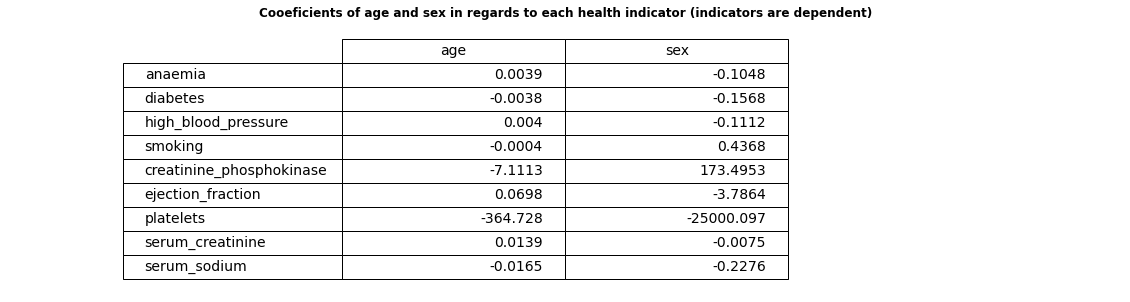

In [7]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = coef_results,  
    rowLabels = health_features,  
    colLabels = ['age', 'sex'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('Cooeficients of age and sex in regards to each health indicator (indicators are dependent)', fontweight ="bold") 
   
plt.show() 

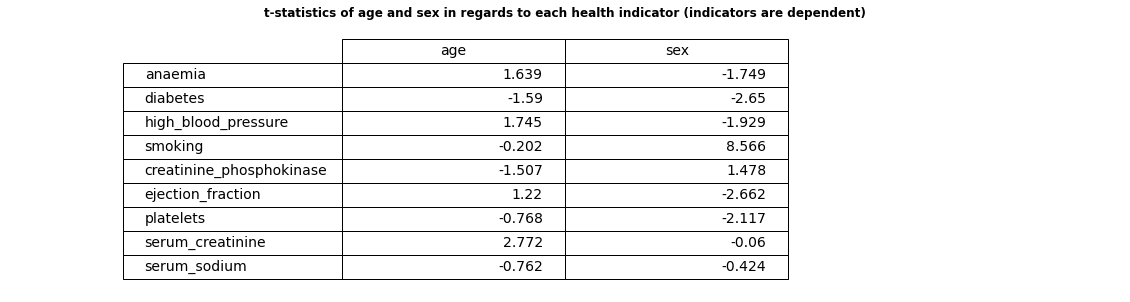

In [8]:
fig, ax = plt.subplots(figsize = (20,5)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = t_results,  
    rowLabels = health_features,  
    colLabels = ['age', 'sex'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('t-statistics of age and sex in regards to each health indicator (indicators are dependent)', fontweight ="bold") 
   
plt.show() 

#### 4. Do health indices affect the mortality rate of patients?


##### ANOVA results

In [9]:
# rsquared: get r squared
# fvalue: get f value
# f_pvalue: get p value
# params: get coefficient
# tvalues: get t-statistic

test_results = []
coef_and_t_results = []
index = 1
results = smf.ols('DEATH_EVENT ~ age + anaemia + creatinine_phosphokinase + diabetes + ejection_fraction + high_blood_pressure' +
                  ' + platelets + serum_creatinine + serum_sodium + sex + smoking + time', data=data).fit()

test_values = [round(results.rsquared, 3), round(results.fvalue, 3), round(results.f_pvalue, 3)]
test_results.append(test_values)
while index < len(results.params):
    coef_and_t_values = [round(results.params[index], 4), round(results.tvalues[index], 3)]
    coef_and_t_results.append(coef_and_t_values)
    index += 1

print(results.summary())
print('\n')

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.04
Date:                Fri, 21 May 2021   Prob (F-statistic):           2.35e-27
Time:                        02:41:13   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             257.8
Df Residuals:                     286   BIC:                             305.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

##### Summary of the analysis

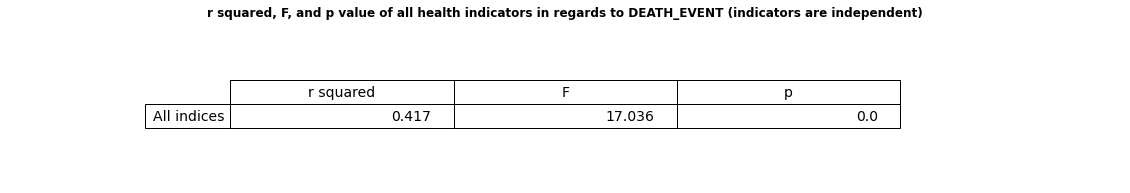

In [10]:
fig, ax = plt.subplots(figsize = (20,3)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = test_results,    
    rowLabels = ['All indices'],
    colLabels = ['r squared', 'F', 'p'],
    colWidths = [0.1] * 3,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('r squared, F, and p value of all health indicators in regards to DEATH_EVENT (indicators are independent)', fontweight ="bold") 
   
plt.show() 

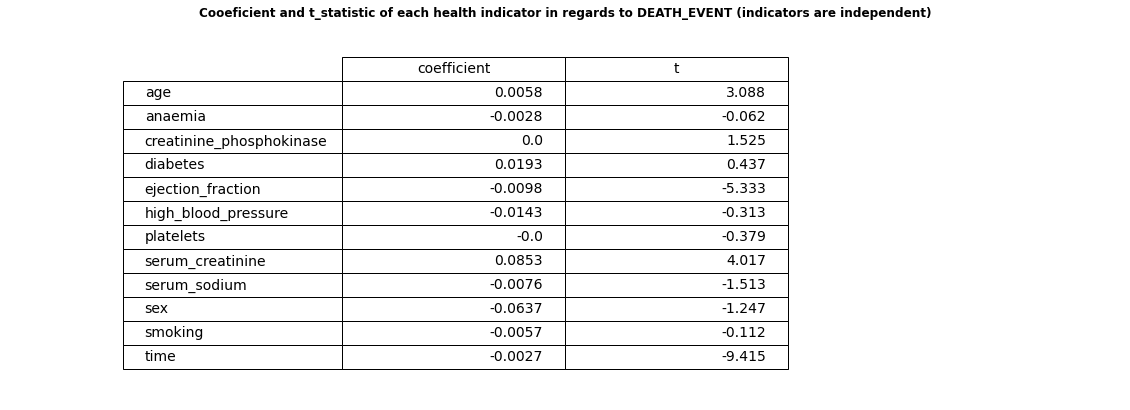

In [11]:
fig, ax = plt.subplots(figsize = (20,7)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = coef_and_t_results,  
    rowLabels = data.columns[:12],  
    colLabels = ['coefficient', 't'],
    colWidths = [0.1] * 2,
    loc = 'center') 
table.set_fontsize(14)
table.scale(2, 2)
   
ax.set_title('Cooeficient and t_statistic of each health indicator in regards to DEATH_EVENT (indicators are independent)', fontweight ="bold") 
   
plt.show() 